<a href="https://colab.research.google.com/github/Dikshab5654/OasisInfo-DA-./blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
# Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the downloaded file
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 68% 45.0M/66.0M [00:00<00:00, 231MB/s]
100% 66.0M/66.0M [00:00<00:00, 225MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('creditcard.csv')
print("Successfully Imported Data!")
df.head(6)

Successfully Imported Data!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [ ]:
#Some Information about Columns DataType
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Do we have NULLs?
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
value_counts = df['Class'].value_counts()
print(value_counts)
# here, class refers to whether the transaction wa fraudulent or not
# 0 corresponds to non fraudulent and 1 coprresponds to fraudulent

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

df_0_sampled = df_0.sample(n=492,random_state=1)
df_1_sampled = df_1.sample(n=492,random_state=1)

df_balanced = pd.concat([df_0_sampled,df_1_sampled])

# Shuffle the concatenated dataframe
df_balanced = df_balanced.sample(frac=1, random_state=1).reset_index(drop=True)

In [ ]:
print(df_0.shape) #Legit Transactions
print(df_1.shape) #Fraud Transactions

(284315, 31)
(492, 31)


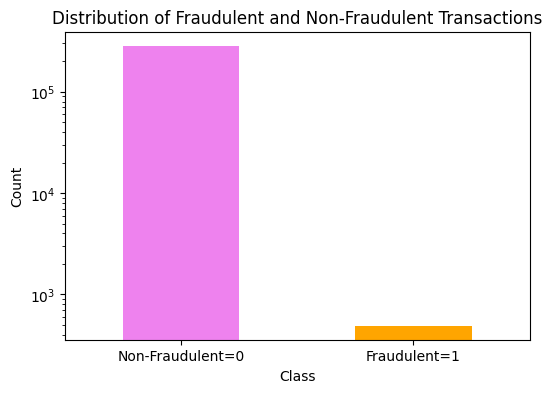

In [ ]:
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar', color=['Violet', 'Orange'])
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent=0', 'Fraudulent=1'], rotation=0)
plt.show()

In [ ]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#Split data into Features and Label
x = df_balanced.drop(['Time','Class'],axis=1)
y = df_balanced.Class

In [ ]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,-0.194120,...,-0.172659,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00
1,-0.372224,0.850924,0.819148,-0.597507,0.941464,0.866622,0.429409,0.376960,-0.414962,-0.159481,...,0.074709,-0.273044,-0.753344,-0.213051,-1.752268,-0.095216,0.193437,0.270997,0.087904,1.29
2,-0.435970,-0.795462,-0.680776,-1.731704,1.434804,-2.180876,0.369731,-0.318681,-1.723893,0.560442,...,0.195485,0.653145,1.480765,0.031083,0.114248,-0.616473,-0.154790,0.142698,0.242053,18.09
3,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,-5.576023,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10
4,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,1.908963,1.077418,...,-0.465679,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,11.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,1.922075,-4.026180,-13.691315,...,1.725578,1.854267,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,0.76
980,-0.793553,-0.597870,1.543639,-2.346881,-1.577631,-0.696792,0.145236,-0.253136,-2.044582,0.917889,...,-0.548226,-0.299200,-0.536743,0.109119,0.323353,-0.456176,-0.614729,-0.047175,0.147718,150.60
981,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.253464,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00
982,-0.844566,0.377297,1.525547,-2.515865,-0.147549,-0.126983,0.201968,0.214737,1.042811,-1.388927,...,-0.099237,-0.157954,-0.595030,-0.180710,0.648623,0.206304,-0.423862,-0.223879,0.064654,2.87


In [ ]:
#Split them into training and testing
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(984, 29) (688, 29) (296, 29)


In [ ]:
#Normalization the data
scaler= StandardScaler()

#scaler.fit(x_train,y_train)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Model Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#fitting the model
model.fit(x_train,y_train)

In [ ]:
#Predict on training
predicted_training = model.predict(x_train)

accuracy = accuracy_score(predicted_training,y_train)

print('Accuracy on Training:',accuracy*100,'%')

Accuracy on Training: 100.0 %


In [ ]:
#Predicting on Testing
predicted_testing = model.predict(x_test)

accuracy = accuracy_score(predicted_testing,y_test)

print('Accuracy on Testing:',accuracy*100,'%')

Accuracy on Testing: 95.27027027027027 %


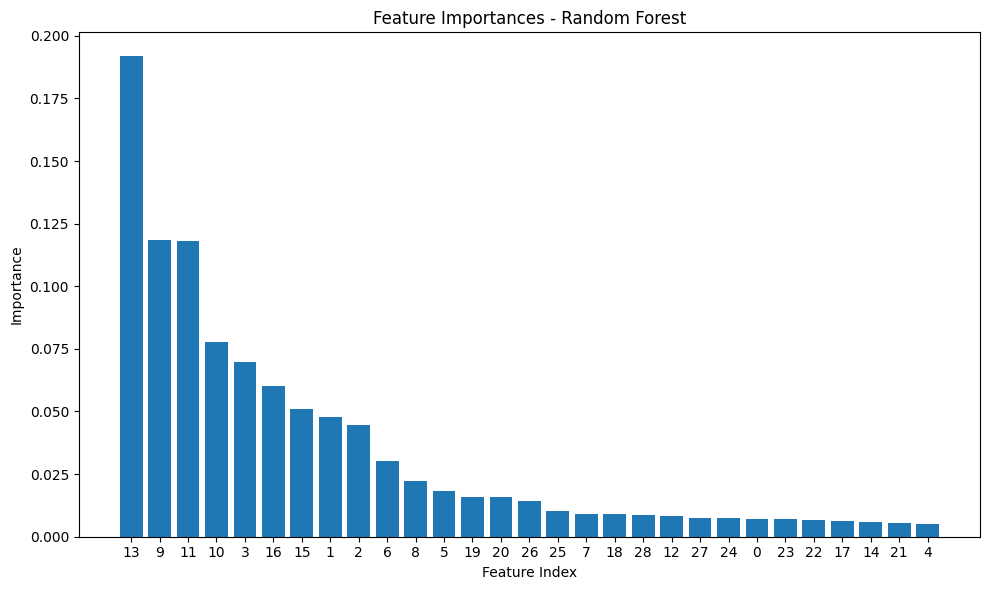

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming 'model' is your trained RandomForestClassifier
# Get the feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
